<a href="https://colab.research.google.com/github/tylerjmwhit/Maching_learning_pratice_notebooks/blob/main/week11assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Exercise 1:

Apply PCA to the facial keypoints images.

Find the number of principal components, n say,  that has over 95% of the explained variance.

Display some of the images in the original 96x96 space after projecting onto the n dimensional principal component space, i.e. apply the inverse transform procedure post projection.

Also plot one of the 96x96 reshaped principal components.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/EE485_dataSets/KeypointsDatasetSmall.csv')
df = df.dropna()
df.columns
df.drop(df.columns[0], inplace=True, axis = 1)
df.index = range(len(df))
df.isna()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
def makeIMG(n):
  Image1 = df['Image'][n]
  Image1 = Image1.split(" ")
  Image1 = np.array(Image1).astype(int)
  # Image1 = Image1.reshape(96,96)
  return Image1

def imPlot(image, n):
  for i in range(1,28,2):
    j = i+1
    plt.plot(df[df.columns[i]][n],df[df.columns[j]][n],'o')
  plt.imshow(image)
  plt.show()

In [ ]:
images = []
for i in range(993):
  images.append(makeIMG(i))
images = np.array(images)
# images.reshape(-1,96,96,1)
images.shape

(993, 9216)

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(.95)
pca.fit(images) # find the better coordinate system

PCA(n_components=0.95)

In [ ]:
print(images.shape)
pca.transform(images).shape

(993, 9216)


(993, 127)

In [ ]:
new_coords = pca.transform(images)
new_coords_plot = new_coords[:,:121]
new_coords_plot.shape

(993, 121)

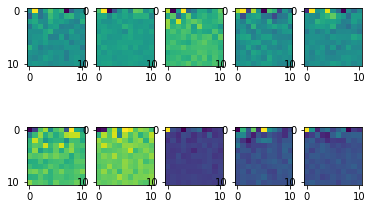

In [ ]:
for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  ax.imshow(new_coords_plot[i].reshape((-1,11)))

In [ ]:
orig_coords = pca.inverse_transform(new_coords)
orig_coords.shape

(993, 9216)

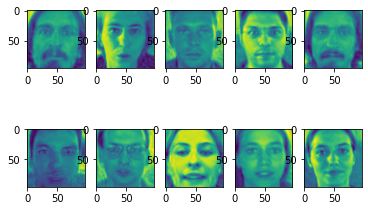

In [ ]:
for i in range(10):
  ax = plt.subplot(2, 5, i+1)
  ax.imshow(orig_coords[i].reshape((-1,96)))

Exercise 2:

Building on from task 1. Run a feedforward neural network on the n principal components to predict the facial keypoints.

Compare the accuracies of the PCA then FF (above) vs only FF networks (earlier assignment).

In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.layers.core.flatten import Flatten
from keras import layers, models, callbacks
model = models.Sequential(
    [
     layers.InputLayer(input_shape=(9216)),
     layers.Flatten(),
     layers.Dense(64, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dense(128, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dense(256, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dense(512, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dropout(.1),
     layers.Dense(30, activation = 'linear')
    ]
)
model.summary()

model1 = models.Sequential(
    [
     layers.InputLayer(input_shape=(127)),
     layers.Flatten(),
     layers.Dense(64, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dense(128, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dense(256, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dense(512, activation = 'relu', kernel_initializer="glorot_uniform"),
     layers.Dropout(.1),
     layers.Dense(30, activation = 'linear')
    ]
)
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_26 (Dense)            (None, 64)                589888    
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dense_29 (Dense)            (None, 512)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_30 (Dense)            (None, 30)               

In [ ]:
targets = df[df.columns[0:30]]
targets = targets.values

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae','mse'])
model.fit(images,targets, epochs=100, validation_split=0.2, batch_size= 16, shuffle = True, verbose = 0)

In [ ]:
model.evaluate(images, targets)
preds = model.predict(images)


32/32 [==============================] - 0s 5ms/step - loss: 17.8347 - mae: 3.1773 - mse: 17.8347


In [ ]:
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae','mse'])
model1.fit(new_coords,targets, epochs=100, validation_split=0.2, batch_size= 16, shuffle = True, verbose = 0)

In [ ]:
model1.evaluate(new_coords, targets)
preds1 = model1.predict(new_coords)

32/32 [==============================] - 0s 2ms/step - loss: 8.3691 - mae: 2.0191 - mse: 8.3691


In [ ]:
from sklearn.metrics import mean_squared_error
orig_score = mean_squared_error(targets,preds)
pca_score = mean_squared_error(targets,preds1)

In [ ]:
print("the mean squared error using the original data set is ", orig_score)
print("where as the mean squared error using the pca dataset is ", pca_score)

the mean squared error using the original data set is  17.83465518080478
where as the mean squared error using the pca dataset is  8.369063292728972


it looks like my pca score was actually the better model